In [1]:
import os
from glob import glob
import shutil

from PIL import Image

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

## Data Preprocessing

Before this step, the image files and their corresponding xml annotation files need to be within the same directory (in this case, named "images"). Change the code below if the files are not of the same extension. The directory structure should look like this:

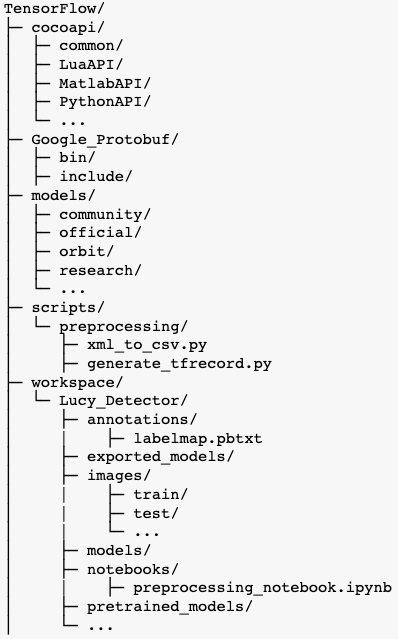


This notebook will then:

1. Transform all .JPG and .jpg files to .jpeg files and delete the duplicative (leftover) .JPG and.jpg files
2. Split the images (image files and corresponding annotation files) into train and test sets and move these files into the /Lucy_Detector/images/train/ and /Lucy_Detector/images/test/ directories.
3. Convert xml annotation files to train and test csv files (2 total)
4. Update the file extensions within the csv files to align with the change in step 1 above
5. Generage TFrecord files for training

Use this link for help: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html

### Split Data into Train and Test Sets

In [2]:
# Convert .JPG and .jpg files to .jpeg
# This assumes that image files and xml annotations are in the same folder named "images"

path = "../images"
for file in os.listdir(path):
    if file.endswith(".JPG") or file.endswith(".jpg"):
        img = Image.open(path + "/" + file)
        file_name, file_ext = os.path.splitext(file)
        new_name = file_name + ".jpeg"
        img.save(path + "/" + new_name)
        
# Delete the .JPG and.jpg files

for file in os.listdir(path):
    if file.endswith(".JPG") or file.endswith(".jpg"):
        path_to_file = os.path.join("../images/", file)
        os.remove(path_to_file)

In [3]:
# Generate a list of the image files
image_files = glob("../images/*.jpeg")

# Strip the extensions
image_names = [name.replace(".jpeg","") for name in image_files]

# Split into train and test
train_names, test_names = train_test_split(image_names, test_size=0.2)

def batch_move_files(file_list, source_path, destination_path):
    """Moves the jpeg and xml file pairs to destination path from source path"""
    
    for file in file_list:
        image = file + ".jpeg"
        xml = file + ".xml"
        shutil.move(os.path.join(source_path, image), destination_path)
        shutil.move(os.path.join(source_path, xml), destination_path)
    return

# Move the files - assumes empty train and test directories at the images directory level

source_dir = "../images/"
test_dir = "../images/test/"
train_dir = "../images/train/"
batch_move_files(test_names, source_dir, test_dir)
batch_move_files(train_names, source_dir, train_dir)

### Generate CSV Files from XML

In [4]:
%run /Users/johngalvin/Desktop/GitHub/Tensorflow/scripts/preprocessing/xml_to_csv.py

Successfully converted xml to csv.


In [5]:
# Change .JPG and .jpg to .jpeg within csv files

train_df = pd.read_csv("/Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/annotations/train_labels.csv")
train_df["filename"] = train_df["filename"].str.replace(".jpg", ".jpeg")
train_df["filename"] = train_df["filename"].str.replace(".JPG", ".jpeg")
train_df.to_csv("/Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/annotations/train_labels.csv")

test_df = pd.read_csv("/Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/annotations/test_labels.csv")
test_df["filename"] = test_df["filename"].str.replace(".jpg", ".jpeg")
test_df["filename"] = test_df["filename"].str.replace(".JPG", ".jpeg")
test_df.to_csv("/Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/annotations/test_labels.csv")

/var/folders/xt/wkt538cx4tbf_ssfzkgm44z40000gn/T/ipykernel_40204/1881215410.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df["filename"] = train_df["filename"].str.replace(".jpg", ".jpeg")
/var/folders/xt/wkt538cx4tbf_ssfzkgm44z40000gn/T/ipykernel_40204/1881215410.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df["filename"] = train_df["filename"].str.replace(".JPG", ".jpeg")
/var/folders/xt/wkt538cx4tbf_ssfzkgm44z40000gn/T/ipykernel_40204/1881215410.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df["filename"] = test_df["filename"].str.replace(".jpg", ".jpeg")
/var/folders/xt/wkt538cx4tbf_ssfzkgm44z40000gn/T/ipykernel_40204/1881215410.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df["filename"] = test_df["filename"].str.replace(".JPG", ".jpeg")

### Generate the TFRecords

In [6]:
%cd /Users/johngalvin/Desktop/GitHub/Tensorflow/scripts/preprocessing
!python generate_tfrecord.py --csv_input=/Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/annotations/train_labels.csv --output_path=/Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/annotations/train.record --image_dir=/Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/images/train/
!python generate_tfrecord.py --csv_input=/Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/annotations/test_labels.csv --output_path=/Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/annotations/test.record --image_dir=/Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/images/test/

/Users/johngalvin/Desktop/GitHub/Tensorflow/scripts/preprocessing
Successfully created the TFRecords: /Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/annotations/train.record
Successfully created the TFRecords: /Users/johngalvin/Desktop/GitHub/Tensorflow/workspace/Lucy_Detector/annotations/test.record
